EXPLORATORY DATA ANALYSIS ON ONLINE GAMING INSIGHTS

Importing The Required Libraries


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the Data

In [10]:
df = pd.read_csv("C:\DATASCIENCE\MYPROJECTS\EDA_project\onlinegaming\online_gaming_behavior_insights.csv")
df.head(10)

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium
5,9005,37,Male,Europe,RPG,20.561855,0,Easy,2,81,74,22,Low
6,9006,25,Male,USA,Action,9.752716,0,Hard,1,50,13,2,Low
7,9007,25,Female,Asia,RPG,4.401729,0,Medium,10,48,27,23,Medium
8,9008,38,Female,Europe,Simulation,18.152733,0,Easy,5,101,23,41,Medium
9,9009,38,Female,Other,Sports,23.942772,0,Easy,13,95,99,36,High


Checking The Types Of DATA


In [11]:
df.dtypes

PlayerID                       int64
Age                            int64
Gender                        object
Location                      object
GameGenre                     object
PlayTimeHours                float64
InGamePurchases                int64
GameDifficulty                object
SessionsPerWeek                int64
AvgSessionDurationMinutes      int64
PlayerLevel                    int64
AchievementsUnlocked           int64
EngagementLevel               object
dtype: object

Dropping The Irrelevant Columns

In [12]:
df = df.drop(columns=['PlayerID'])
df.head(10)

,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium
5,37,Male,Europe,RPG,20.561855,0,Easy,2,81,74,22,Low
6,25,Male,USA,Action,9.752716,0,Hard,1,50,13,2,Low
7,25,Female,Asia,RPG,4.401729,0,Medium,10,48,27,23,Medium
8,38,Female,Europe,Simulation,18.152733,0,Easy,5,101,23,41,Medium
9,38,Female,Other,Sports,23.942772,0,Easy,13,95,99,36,High


Checking Duplicates

In [13]:
df.shape

(40034, 12)

In [14]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 12)


In [15]:
df.count()

Age                          40034
Gender                       40034
Location                     40034
GameGenre                    40034
PlayTimeHours                40034
InGamePurchases              40034
GameDifficulty               40034
SessionsPerWeek              40034
AvgSessionDurationMinutes    40034
PlayerLevel                  40034
AchievementsUnlocked         40034
EngagementLevel              40034
dtype: int64

In [16]:
df.duplicated().sum()


0

Checking Null Values 

In [17]:
print(df.isnull().sum())


Age                          0
Gender                       0
Location                     0
GameGenre                    0
PlayTimeHours                0
InGamePurchases              0
GameDifficulty               0
SessionsPerWeek              0
AvgSessionDurationMinutes    0
PlayerLevel                  0
AchievementsUnlocked         0
EngagementLevel              0
dtype: int64


Detecting Outliers

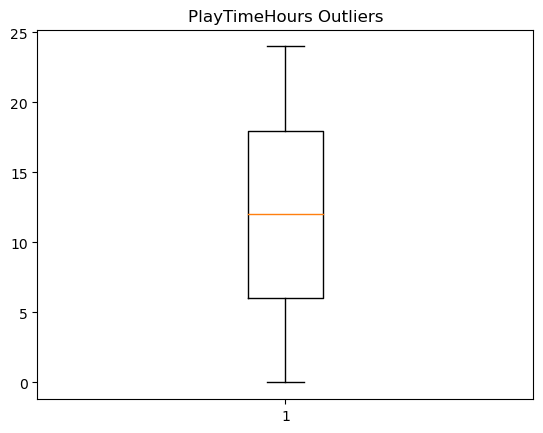

In [18]:
plt.boxplot(df['PlayTimeHours'])
plt.title('PlayTimeHours Outliers')
plt.show()

Statistical Analysis

In [19]:
df.describe()


,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
count,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000,40034.000000
mean,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
std,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
25%,23.000000,6.067501,0.000000,4.000000,52.000000,25.000000,12.000000
50%,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
75%,41.000000,17.963831,0.000000,14.000000,137.000000,74.000000,37.000000
max,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


In [20]:
#Mean,Median,Std
num_cols = df.select_dtypes(include='number').columns
stats = df[num_cols].agg(['mean', 'median', 'std', 'min', 'max'])
stats


,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
mean,31.992531,12.024365,0.200854,9.471774,94.792252,49.655568,24.526477
median,32.000000,12.008002,0.000000,9.000000,95.000000,49.000000,25.000000
std,10.043227,6.914638,0.400644,5.763667,49.011375,28.588379,14.430726
min,15.000000,0.000115,0.000000,0.000000,10.000000,1.000000,0.000000
max,49.000000,23.999592,1.000000,19.000000,179.000000,99.000000,49.000000


In [21]:
df.groupby('EngagementLevel').mean(numeric_only=True)


,Age,PlayTimeHours,InGamePurchases,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked
EngagementLevel,,,,,,,
High,31.920085,12.069238,0.206463,14.254547,131.921827,50.823723,25.095975
Low,31.896939,12.104915,0.197307,4.530511,66.882119,46.101414,22.661565
Medium,32.082120,11.957503,0.199752,9.553267,89.856405,50.926293,25.216424


Visualization

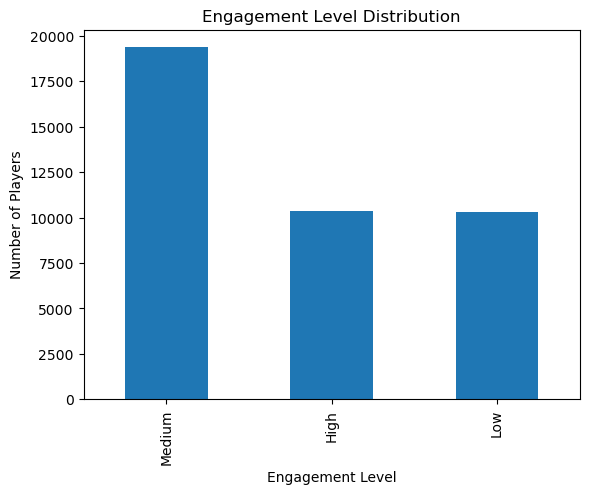

In [22]:
df['EngagementLevel'].value_counts().plot(kind='bar')
plt.title('Engagement Level Distribution')
plt.xlabel('Engagement Level')
plt.ylabel('Number of Players')
plt.show()

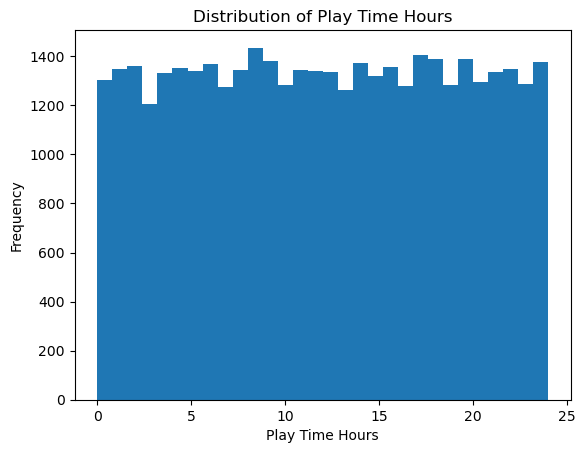

In [23]:
plt.hist(df['PlayTimeHours'], bins=30)
plt.title('Distribution of Play Time Hours')
plt.xlabel('Play Time Hours')
plt.ylabel('Frequency')
plt.show()


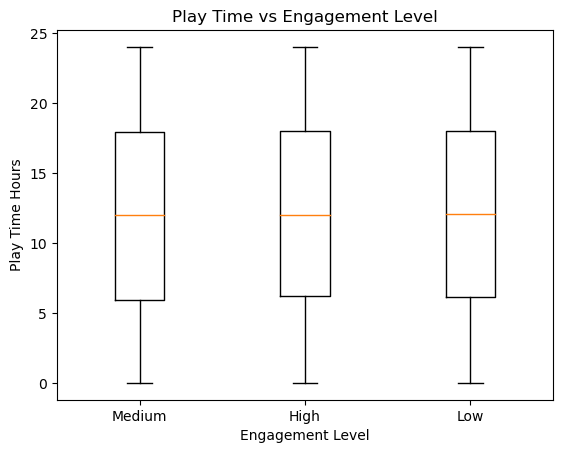

In [24]:
#EngagementLevel v/s PlayTimeHours
plt.boxplot(
    [df[df['EngagementLevel'] == lvl]['PlayTimeHours'] 
     for lvl in df['EngagementLevel'].unique()],
    labels=df['EngagementLevel'].unique()
)

plt.title('Play Time vs Engagement Level')
plt.xlabel('Engagement Level')
plt.ylabel('Play Time Hours')
plt.show()


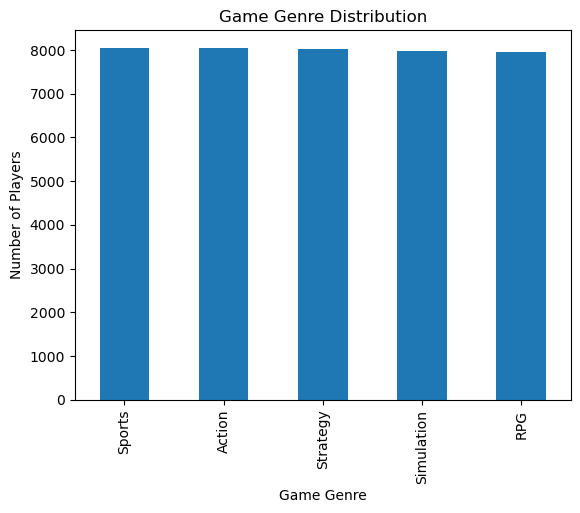

In [25]:
#GameGenre Popularity
df['GameGenre'].value_counts().plot(kind='bar')
plt.title('Game Genre Distribution')
plt.xlabel('Game Genre')
plt.ylabel('Number of Players')
plt.show()


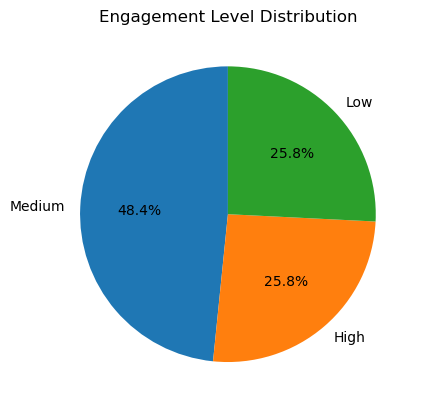

In [26]:
engagement_counts = df['EngagementLevel'].value_counts()

plt.figure()
plt.pie(
    engagement_counts,
    labels=engagement_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Engagement Level Distribution')
plt.show()

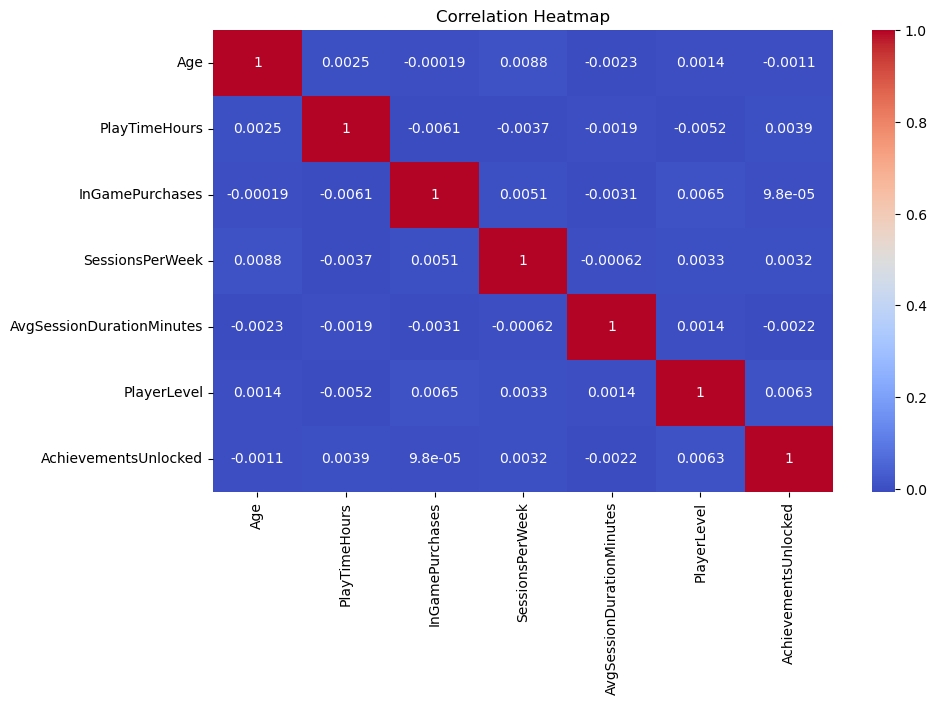

In [27]:

num_corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(num_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


The dataset is clean with no missing values or duplicates, making it suitable for analysis. Exploratory analysis shows that player engagement is strongly influenced by behavioral factors such as playtime, session frequency, player level, and achievements. Higher engagement levels are associated with increased activity and progression, while demographic features like age, gender, and location have minimal impact. A small number of high-activity users were identified as outliers, representing genuine highly engaged players. Overall, the analysis indicates that user behavior is the primary driver of engagement, providing a strong basis for further predictive modeling.